In [ ]:
# 11 Task: Demonstrate bias-variance tradeoﬀ using polynomial regression on the dataset.

#New dataset: Employee Job Satisfaction
data = pd.read_csv("employee.csv")

#Create DataFrame
df = pd.DataFrame(data)
df

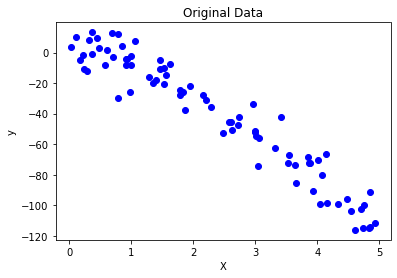

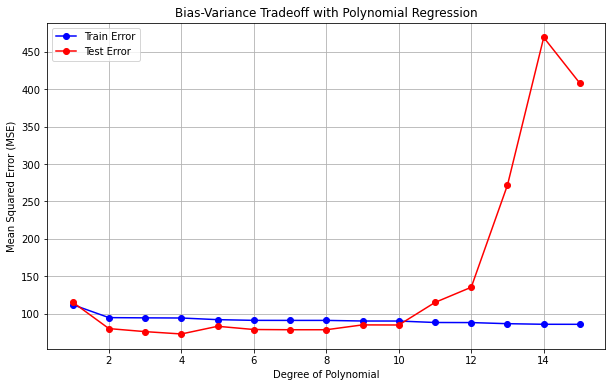

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generating a synthetic dataset (for demonstration purposes)
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)  # 80 data points
y = X**3 - 10 * X**2 + 3 * X + np.random.randn(80, 1) * 10  # Non-linear relationship

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize the data
plt.scatter(X, y, color='blue', label='Data points')
plt.title("Original Data")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# Define a function to perform polynomial regression and calculate errors
def polynomial_regression(X_train, X_test, y_train, y_test, degree):
    # Generate polynomial features for the given degree
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Fit the polynomial regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predict on the train and test data
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Calculate Mean Squared Error (MSE) for train and test
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    return train_mse, test_mse, model, poly

# Evaluate the Bias-Variance tradeoff
train_errors = []
test_errors = []
degrees = range(1, 16)

for degree in degrees:
    train_mse, test_mse, model, poly = polynomial_regression(X_train, X_test, y_train, y_test, degree)
    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Train Error', color='blue', marker='o')
plt.plot(degrees, test_errors, label='Test Error', color='red', marker='o')
plt.title("Bias-Variance Tradeoff with Polynomial Regression")
plt.xlabel("Degree of Polynomial")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.grid(True)
plt.show()
